# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

<b>Question 1: Is the distribution of body temperatures normal?

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import scipy.stats
import math

temp = pd.read_csv('human_body_temperature.csv')

n = number of data points
<p>x = x-values for ECDF(temp)</p>
y = y-values for ECDF(temp)

In [95]:
def ecdf(temp):
    n = len(temp)
    x = np.sort(temp)
    y = np.arange(1, n+1) / n

    return x, y

In [96]:
x, y = ecdf(temp["temperature"])

Text(0, 0.5, 'Cumulative Distribution Function')

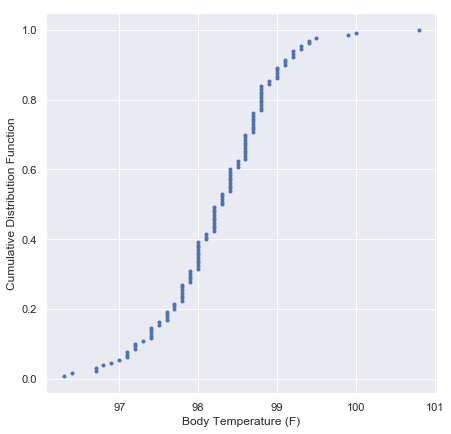

In [97]:
plt.figure(figsize=(7,7))
sns.set()
plt.plot(x, y, marker=".", linestyle="none")
plt.xlabel("Body Temperature (F)")
plt.ylabel("Cumulative Distribution Function")

In [98]:
temp_samples = np.random.normal(np.mean(temp["temperature"]), np.std(temp["temperature"]), size=10000)
x_theor, y_theor = ecdf(temp_samples)

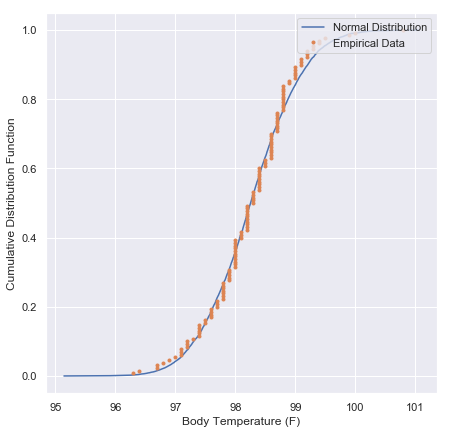

In [99]:
plt.figure(figsize=(7,7))
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker=".", linestyle="none")
plt.xlabel("Body Temperature (F)")
plt.ylabel("Cumulative Distribution Function")
plt.legend(('Normal Distribution', 'Empirical Data'), loc= 'upper right')

Visually speaking, we can see that the distribution is fairly normal. To confirm, I will use normaltest. 

In [100]:
print(stats.normaltest(temp["temperature"]))


NormaltestResult(statistic=2.703801433319203, pvalue=0.2587479863488254)


In [101]:
temp_obs = temp.temperature.sort_values()
mean, std = temp_obs.mean(),temp_obs.std()
k2,p = scipy.stats.normaltest(temp_obs)

In [102]:
if p < 0.05:
    print("Not Normal Distribution")
else:
    print("Normal Distribution")

Normal Distribution


<b>Question 2: Is the sample size large? Are the observations independent?

In [103]:
print(len(temp))

130


The sample size > 30, which satisfies the CLT requirement. Furthermore, the samples were taken from different people, and therefore, indepedent. 

<b>Question 3: Is the true population mean really 98.6 degrees F?<p>
(a) First, try a bootstrap hypothesis test.

Step 1: State null and alternative hypotheses:
<li>H0: mean = 98.6
<li>Ha: mean != 98.6
    <p>Step 2: Set the significance level . We’ll choose 5% (0.05).</p>
<p>Step 3: Choose a test statistic. We wish to estimate the mean temperature, and therefore we’ll use the
    sample average.</p>
    <p>Step 4: Find the observed value of the test statistic:</p>

In [104]:
temp_mean = temp['temperature'].mean()
print(temp_mean)

98.24923076923078


We now need the p-value, but to do this we need to know the sampling distribution of our test
statistic when the null hypothesis is true. So I will simulate conditions in which the null hypothesis is true. I will use the sample data to represent the population by resampling at random with replacement.

In [105]:
fake_population = np.empty(1000)
for i in range(1000):
    fake_population[i] = np.mean(np.random.choice(temp['temperature'],len(temp['temperature'])))
fake_population = np.around(fake_population, decimals=1)
p = np.sum(fake_population == 98.6) / size
print(p)

0.0


Because p < 0.05, we can reject the null hypothesis

<b> 3(b) Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
In this situation, is it appropriate to use the  𝑡  or  𝑧  statistic?

I would use a one-sample test because I am comparing a set of temperatures against the population mean. I would use a two-sample test if I were comparing my sample set to two different possible means. In this situation, it is appropriate to use the t-statistic because the t-score is based on sample standard deviation, whereas the z-score is based on population standard deviation. 
<p> To solve for t, we use the following equation with size n, mean m, standard deviation S, and theoretical value μ:</p><p>
t = m−μ / (s/sqrt(n))

In [107]:
mean = temp.temperature.mean() #m
std = temp.temperature.std() #s
median = temp.temperature.median()
sample_size = len(temp.temperature) #n
dg_freedom = sample_size - 1
#μ = 98.6
t_value = (mean - 98.6) / (std/math.sqrt(sample_size))
print(t_value)

-5.454823292364079


Because t-distributions are symmetric, the average human body temperature from our sample is -5.454823292364079 and 5.454823292364079 standard errors below and above the population mean (98.6) provided the null hypothesis is true.<p>
I will use scipy.stats to find the p-value and confirm my t-value. 

In [117]:
scipy.stats.ttest_1samp(temp["temperature"], 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

My obtained p-value shows that the chances of the temperature mean of my sample being 98.3 happening at random is .00000024%, which is extremely lower than my significance level of 0.05 This means we can reject the null hypothesis that states the true population average human body temperature is 98.6 

<b>3(b) Now try using the other test. How is the result be different? Why?

In [122]:
z_value = ((mean - 98.6) / (std / np.sqrt(n)))
print(z_value)
p_value = scipy.stats.norm.sf(abs(z_value))*2
print(p_value)

-5.454823292364079
4.90215701411338e-08


The p-value derived from the z-test is 4.90215701411338e-08, one order of magnitude smaller than the p-value derived from the t-test: 2.4106320415561276e-07. This means, if the sample standard deviation is truly representative of the population standard deviation, then it is even more unlikely that 98.6 is the true population human body temperature mean. <p>
This value is different because the z-distribution is the “standardized” normal distribution, whereas the t-distribution depends on sample size. 

<b>4. Draw a small sample of size 10 from the data and repeat both frequentist tests.
Which one is the correct one to use?
What do you notice? What does this tell you about the difference in application of the  𝑡  and  𝑧  statistic?

In [134]:
small_sample = np.random.choice(temp['temperature'], size=10, replace=False)
tt, tp = scipy.stats.ttest_1samp(small_sample, 98.6)
from statsmodels.stats.weightstats import ztest
zt, zp = ztest(small_sample, value=98.6)
print(tp, zp)

0.02204698580233821 0.00574828267684863


In [142]:
small_sample = np.random.choice(temp['temperature'], size=10, replace=False)
tt, tp = scipy.stats.ttest_1samp(small_sample, 98.6)
zt, zp = ztest(small_sample, value=98.6)
print('p-value from t-test:', tp)
print('p-value from z-test', zp)

p-value from t-test: 0.18320240761337536
p-value from z-test 0.1493246103205033


In [143]:
small_sample = np.random.choice(temp['temperature'], size=10, replace=False)
tt, tp = scipy.stats.ttest_1samp(small_sample, 98.6)
from statsmodels.stats.weightstats import ztest
zt, zp = ztest(small_sample, value=98.6)
print('p-value from t-test:', tp)
print('p-value from z-test', zp)

p-value from t-test: 0.8080008466419445
p-value from z-test 0.8023815276197006


In [144]:
small_sample = np.random.choice(temp['temperature'], size=10, replace=False)
tt, tp = scipy.stats.ttest_1samp(small_sample, 98.6)
from statsmodels.stats.weightstats import ztest
zt, zp = ztest(small_sample, value=98.6)
print('p-value from t-test:', tp)
print('p-value from z-test', zp)

p-value from t-test: 0.08303212332939443
p-value from z-test 0.05123463329210577


In [145]:
small_sample = np.random.choice(temp['temperature'], size=10, replace=False)
tt, tp = scipy.stats.ttest_1samp(small_sample, 98.6)
from statsmodels.stats.weightstats import ztest
zt, zp = ztest(small_sample, value=98.6)
print('p-value from t-test:', tp)
print('p-value from z-test', zp)

p-value from t-test: 0.30356745968909166
p-value from z-test 0.27521945180008034


As shown above, the p-value obtained from the z-test is consistently lower than that obtained from the t-test. In this case, the correct test would be to use the t-test because the sample size is less than 30. T-test is used when the mean is known, and population variance is approximated from the sample data set.  Z-test is based on standard normal distribution.

<b>5. At what temperature should we consider someone's temperature to be "abnormal"?
As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

In [148]:
confidence_int = np.percentile(fake_population, [2.5, 97.5])
print('The confidence interval is from: ', confidence_int[0], ' to ', confidence_int[1])

The confidence interval is from:  98.1  to  98.4


For 95% confidence, the z-value is 1.96, so the margin of error is: 

In [149]:
moe = 1.96 * fake_population.std()
print(moe)

0.13747957515209236


Therefore, temperatures outside of this range is considered abnormal. 

Using the frequentist approach:

In [153]:
std_temp = temp['temperature'].std() / np.sqrt(len(temp['temperature']))
moe_temp = 1.96 * std_temp
print(std_temp)
print('The margin of error is: ', moe_temp)

0.06430441683789101
The margin of error is:  0.12603665700226638


The 95% confidence interval is from the mean temperature +/- the margin of error. 

In [154]:
mean_temp = np.mean(temp['temperature'])
print('The 95% confidence interval is from: ', mean_temp - moe_temp, ' to ', mean_temp + moe_temp)

The 95% confidence interval is from:  98.12319411222852  to  98.37526742623304


Temperatures outside of this range are considered abnormal. 

<b>6. Is there a significant difference between males and females in normal temperature?
What testing approach did you use and why?
Write a story with your conclusion in the context of the original problem.

To test if there is a significant difference between male and female body temperatures, we use a two-sample t-test because we separate the sample data into two sample distributions: male and female. A t-test is appropriate because we do not have the population standard deviations for the two samples.

Null hypothesis: The average temperature of males is equal to the average temperature of females. <p>
Alternative hypothesis: The average temperature of males and females is different. </p><p>
Significance level = 0.05

In [155]:
males = temp.loc[(temp.gender == 'M')]
females = temp.loc[(temp.gender == 'F')]
t, p = scipy.stats.ttest_ind(males['temperature'], females['temperature'])
print(p)

0.02393188312239561


Because the p-value < 0.05, we can reject the null hypothesis and accept the alternative. To confirm this about my own sample data set, I will calculate the means of both the males and females. 

In [158]:
males_mean = males['temperature'].mean()
females_mean = females['temperature'].mean()
print('The average male human body temperature in this data set is: ', males_mean)
print('The average female human body temperature in this data set is: ', females_mean)

The average male human body temperature in this data set is:  98.1046153846154
The average female human body temperature in this data set is:  98.39384615384613


According to this data set, the true population mean actually lies between 98.1  to  98.4, and is not 98.6. <p>
Furthermore, for these 130 samples, temperatures outside of this range can be considered abnormal.</p><p>
Lastly, according to the two-sample test, the p-value is less than 0.05, so there is a likely chance that there is a difference between men and women body temperatures. 